# Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Loading data

In [9]:
os.chdir('C:\\Users\\Avita\\OneDrive\\Desktop\\Capstone Project\\Churn Rate Prediction')

In [10]:
cust_df=pd.read_csv('ecommerce_customer_data_large.csv')

In [11]:
cust_df.head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


# Checking data

In [12]:
cust_df.shape

(250000, 13)

In [13]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [14]:
cust_df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [15]:
# Purchase date should be in datetime datatype

In [16]:
cust_df.describe(include='number').T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Customer ID,1.0,12590.0,25011.0,37441.25,50000.0
Product Price,10.0,132.0,255.0,377.00,500.0
Quantity,1.0,2.0,3.0,4.00,5.0
Total Purchase Amount,100.0,1476.0,2725.0,3975.00,5350.0
Customer Age,18.0,30.0,44.0,57.00,70.0
Returns,0.0,0.0,1.0,1.00,1.0
Age,18.0,30.0,44.0,57.00,70.0
Churn,0.0,0.0,0.0,0.00,1.0


# Data cleaning

In [17]:
cust_df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [18]:
cust_df['Returns']=cust_df['Returns'].fillna(0)

In [19]:
cust_df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [20]:
# Null in 'Returns' likely means the item was not returned, so i replaced with 0

In [21]:
cust_df.duplicated().sum()

0

In [22]:
cust_df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [23]:
cust_df['Purchase Date']=pd.to_datetime(cust_df['Purchase Date'])

In [24]:
cust_df.dtypes

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object

# EDA and Visualization 

In [25]:
# Histogram - to show the distibution of single continuous column

In [26]:
num_col=cust_df.select_dtypes('number')

In [27]:
num_col.head(2)

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
0,44605,177,1,2427,31,1.0,31,0
1,44605,174,3,2448,31,1.0,31,0


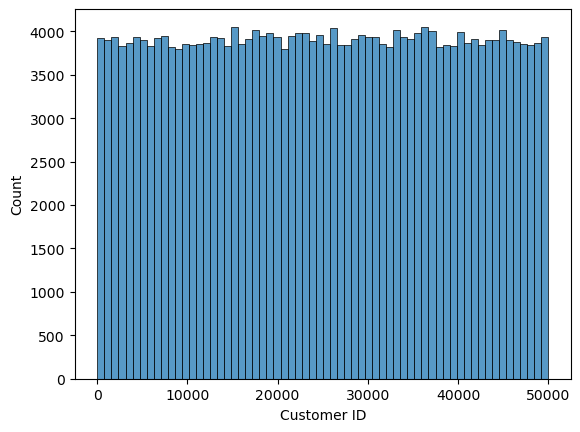

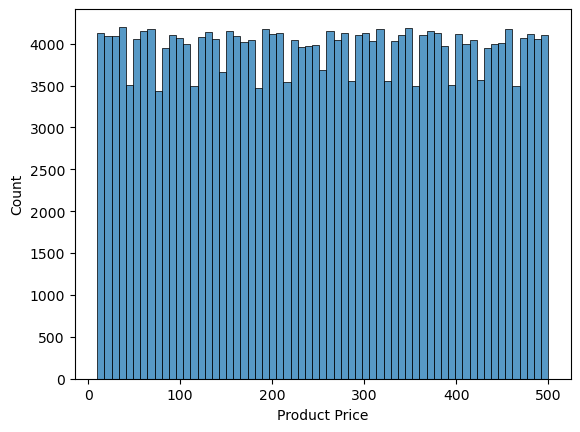

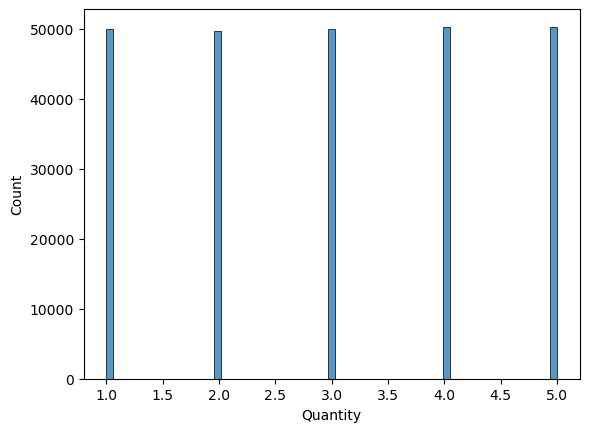

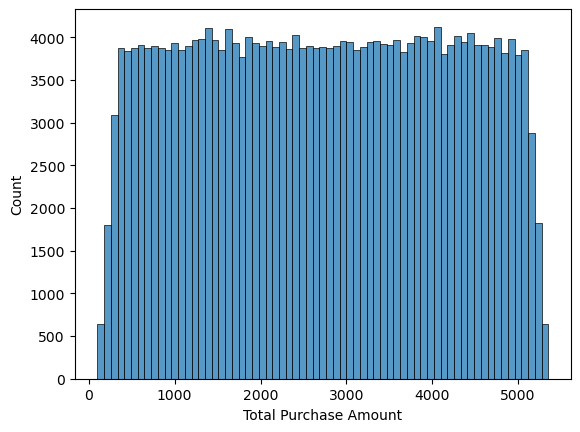

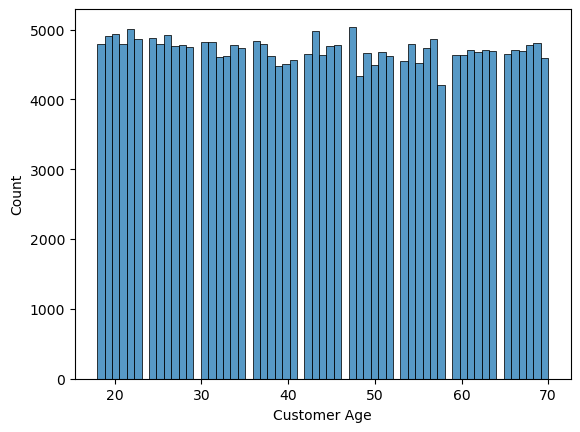

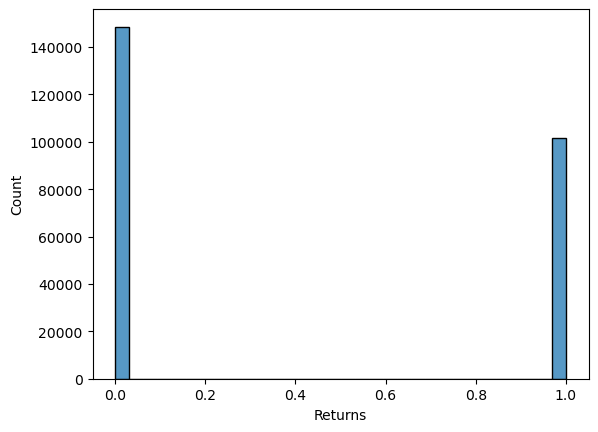

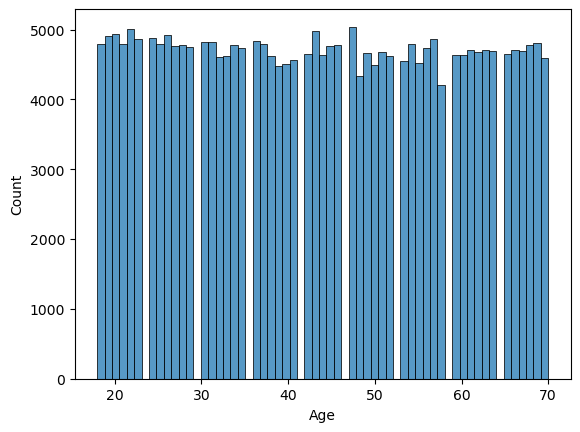

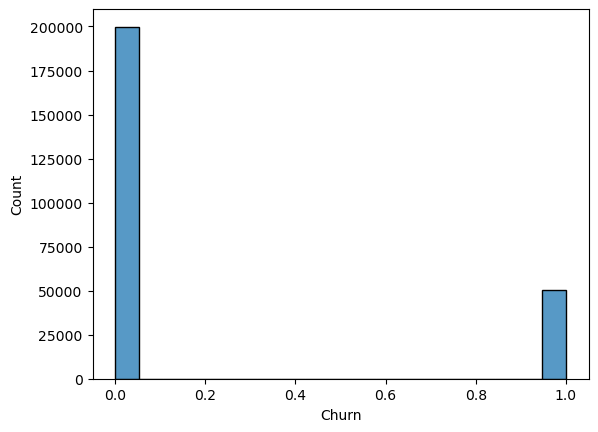

In [28]:
for i in num_col:
    sns.histplot(data=num_col,x=i)
    plt.show()

### Observation
### No strong insight observed using histogram

In [29]:
# Boxplot- to check mean median and outliers of numeric column

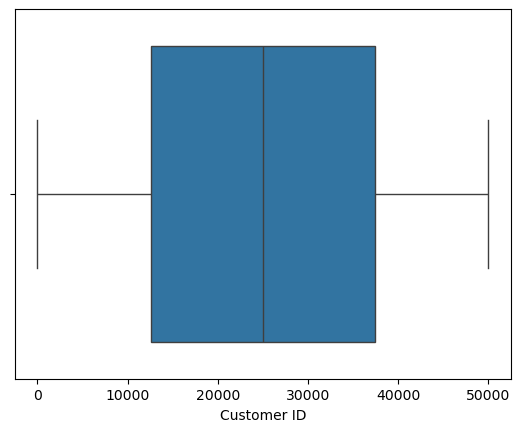

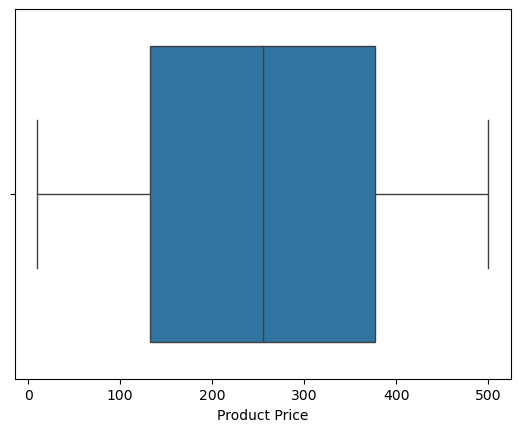

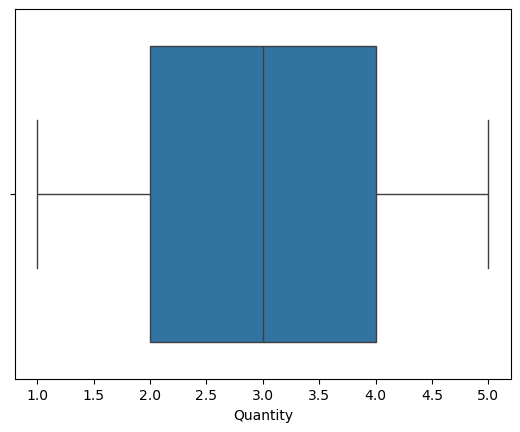

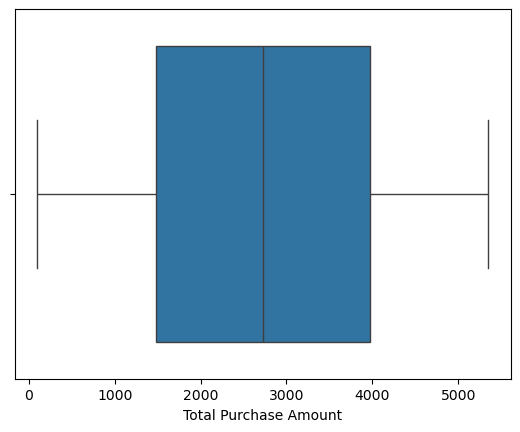

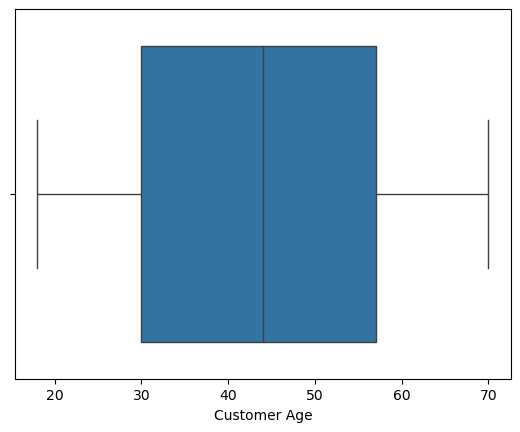

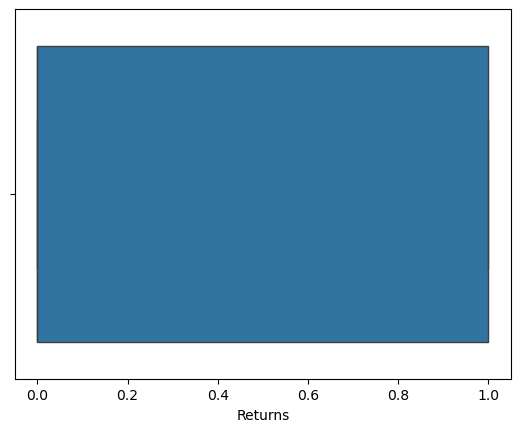

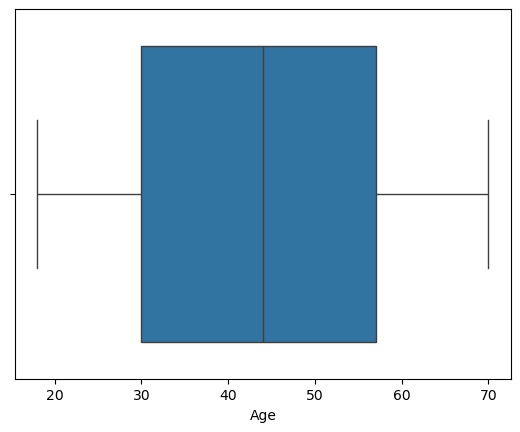

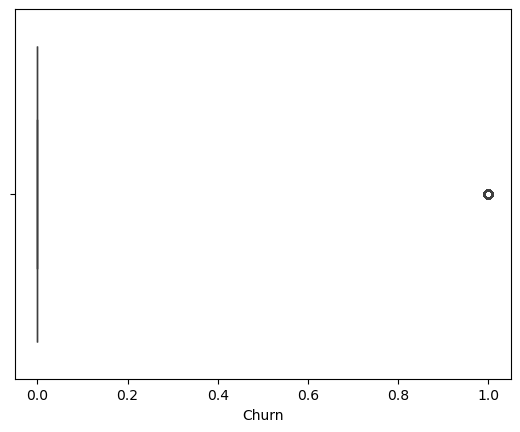

In [30]:
for i in num_col:
    sns.boxplot(data=num_col,x=i)
    plt.show()

### Observation
### No significant outliers were detected in any continuous numerical columns using boxplots.
### The only plot that showed a potential outlier was for the Churn column, which is binary (0/1), and hence the outlier indication is not meaningful.

In [31]:
# Heatmap- to show how two categorical variable are related

In [32]:
num_col.drop('Customer ID',axis=1,inplace=True)

In [33]:
num_corr=num_col.corr()

<Axes: >

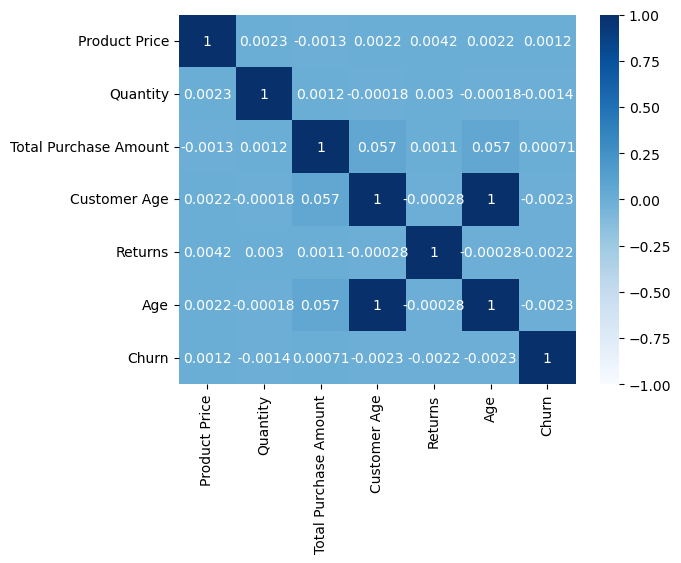

In [34]:
sns.heatmap(data=num_corr,annot=True,vmin=-1,vmax=+1,cmap='Blues')

### Observation

### The correlation heatmap shows very weak relationships among all numeric features. 
### None of the correlations exceed 0.1 in absolute value, which implies:

### - No strong linear relationship exists between any pair of numeric variables.
### - There is no concern of multicollinearity in the data.
### - Each feature may contribute independently to the target (`Churn`) or business KPIs.


In [35]:
# Barplot/Countplot- to show the occurance of category data

In [36]:
cat_col=cust_df.select_dtypes('object')

In [37]:
cat_col.columns

Index(['Product Category', 'Payment Method', 'Customer Name', 'Gender'], dtype='object')

In [38]:
selected_col=['Product Category','Payment Method','Gender']

In [39]:
selected_col

['Product Category', 'Payment Method', 'Gender']

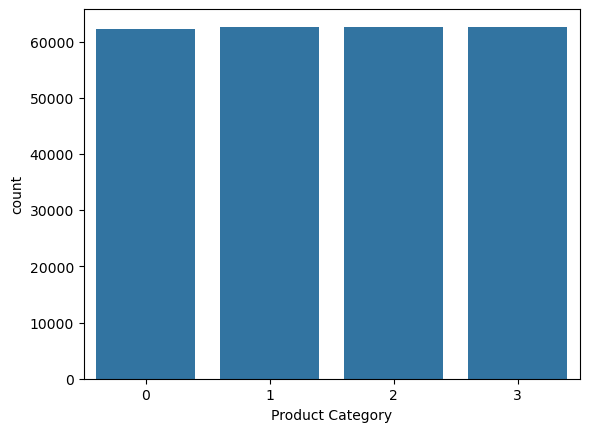

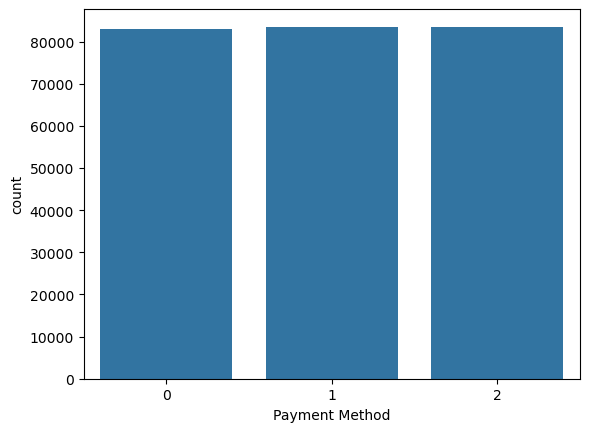

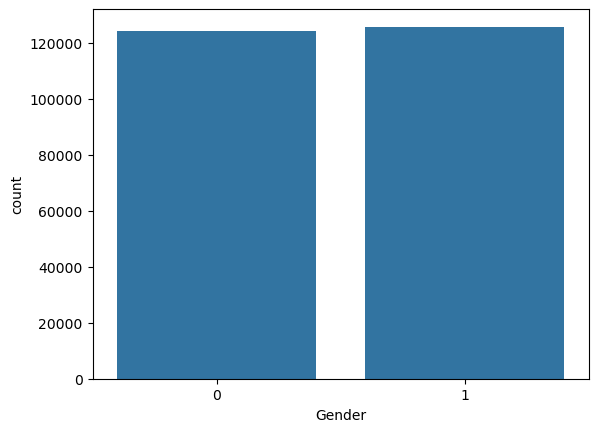

In [96]:
for i in selected_col:
    sns.countplot(data=cust_df,x=i,)
    plt.show()

### Observation

### I removed the 'Customer Name' column from the plots because it had too many unique values.
### I used 'Product Category','Gender','Payment Method' instead.
### All of them showed almost exactly equal counts , which means the data is well-balanced

In [41]:
cust_df.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0


In [42]:
# 1.Total Revenue and Quantity by Product Category

In [43]:
cust_df[['Product Category','Total Purchase Amount','Quantity']].groupby('Product Category').sum().sort_values(by='Total Purchase Amount',ascending=False)

,Total Purchase Amount,Quantity
Product Category,,
Home,171138916,188077
Clothing,170716122,188688
Electronics,170146025,187861
Books,169345236,186608


#### Highest revenue comes from 'Home' product category

In [44]:
# 2. Revenue by Product Category and Gender

In [45]:
cust_df[['Product Category', 'Gender', 'Total Purchase Amount']]\
    .groupby(['Product Category', 'Gender'])\
    .sum()\
    .sort_values(by='Total Purchase Amount', ascending=False)

,,Total Purchase Amount
Product Category,Gender,
Clothing,Male,86016131
Home,Male,85990089
Electronics,Male,85420099
Books,Male,85360524
Home,Female,85148827
Electronics,Female,84725926
Clothing,Female,84699991
Books,Female,83984712


#### Highest revenue generated by Male and Female in Clothing and Home category

In [46]:
#3. Average Order Value by Payment Method 

In [47]:
cust_df[['Payment Method', 'Total Purchase Amount']]\
    .groupby('Payment Method')\
    .mean()\
    .sort_values(by='Total Purchase Amount', ascending=False)

,Total Purchase Amount
Payment Method,
Credit Card,2738.852562
PayPal,2721.677952
Cash,2715.557437


#### Credit card has highest average payment

In [48]:
#4. Churn Rate by Product Category

In [49]:
cust_df[['Product Category', 'Churn']]\
    .groupby('Product Category')\
    .mean()\
    .sort_values(by='Churn', ascending=False)*100

,Churn
Product Category,
Clothing,20.122721
Books,20.079683
Electronics,20.043110
Home,19.962585


#### Clothing has highest churn rate

In [50]:
#5. Churn Rate by Gender

In [51]:
cust_df[['Gender', 'Churn']]\
    .groupby('Gender')\
    .mean()\
    .sort_values(by='Churn', ascending=False)*100

,Churn
Gender,
Female,20.162640
Male,19.942551


#### Females has highest churn rate

In [52]:
#6. Total Revenue by Age Group 

In [53]:
cust_df['Age Group'] = pd.cut(cust_df['Age'],bins=[0, 18, 35, 50, 100],labels=['Teen', 'Adult', 'Senior', 'Senior Citizen'])

In [54]:
cust_df[['Age Group', 'Total Purchase Amount']]\
    .groupby('Age Group')\
    .sum()\
    .sort_values(by='Total Purchase Amount',ascending=False)

C:\Users\Avita\AppData\Local\Temp\ipykernel_1536\76492350.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')\


,Total Purchase Amount
Age Group,
Senior Citizen,262728575
Adult,215918950
Senior,190214483
Teen,12484291


#### Highest Revenue genrated by Senior Citizen

In [55]:
#7. Monthly Revenue Trend 

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Purchase Month'>

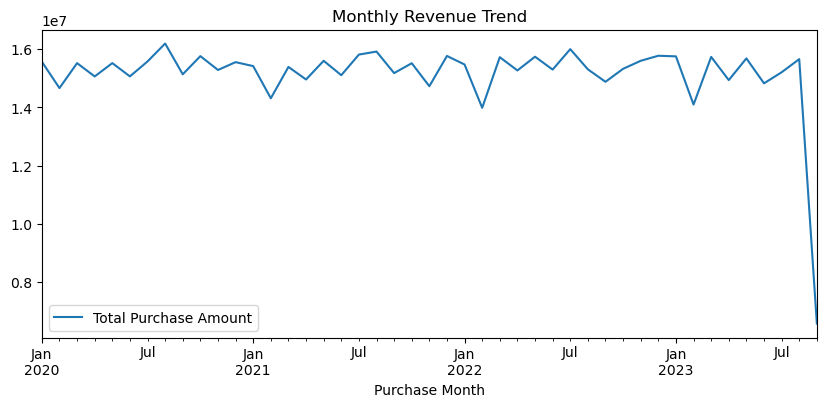

In [56]:
cust_df['Purchase Month'] = pd.to_datetime(cust_df['Purchase Date']).dt.to_period('M')
cust_df[['Purchase Month', 'Total Purchase Amount']]\
    .groupby('Purchase Month')\
    .sum()\
    .plot(kind='line', figsize=(10,4), title='Monthly Revenue Trend')


## Final Summary of Insights

### • The **Home** category generated the highest revenue, followed by **Clothing** and **Electronics**.

### • Both **Male** and **Female** customers contributed across all categories, males spent more on **Clothing**, while females preferred **Home** products.

### • **Credit Card** was the most used payment method and had the highest average order value.

### • **Churn rate** was slightly higher in the **Clothing** and **Books** categories, suggesting potential customer dissatisfaction.

### • **Female customers** had a slightly higher churn rate than males.

### • The **Senior Citizen** age group (50–100) contributed the most to total revenue, making them the most valuable customer segment.

### • The **monthly revenue trend** remained stable with a few small peaks, indicating consistent customer engagement.


# Machine Learning - Churn Prediction

In [57]:
## Predict the churn rate - Supervised Approach / Binary Classification 

## Label Encoding

In [58]:
cat_col.drop(columns='Customer Name',inplace=True)

In [59]:
for col in cat_col:
    le=LabelEncoder()
    cust_df[col]=le.fit_transform(cust_df[col])

In [60]:
cust_df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age Group,Purchase Month
0,44605,2023-05-03 21:30:02,3,177,1,2427,2,31,1.0,John Rivera,31,0,0,Adult,2023-05
1,44605,2021-05-16 13:57:44,2,174,3,2448,2,31,1.0,John Rivera,31,0,0,Adult,2021-05
2,44605,2020-07-13 06:16:57,0,413,1,2345,1,31,1.0,John Rivera,31,0,0,Adult,2020-07
3,44605,2023-01-17 13:14:36,2,396,3,937,0,31,0.0,John Rivera,31,0,0,Adult,2023-01
4,44605,2021-05-01 11:29:27,0,259,4,2598,2,31,1.0,John Rivera,31,0,0,Adult,2021-05


In [61]:
le = LabelEncoder()
cust_df['Age Group'] = le.fit_transform(cust_df['Age Group'])

In [62]:
# Age Group was left so converting this column seprately

In [63]:
cust_df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age Group,Purchase Month
0,44605,2023-05-03 21:30:02,3,177,1,2427,2,31,1.0,John Rivera,31,0,0,0,2023-05
1,44605,2021-05-16 13:57:44,2,174,3,2448,2,31,1.0,John Rivera,31,0,0,0,2021-05
2,44605,2020-07-13 06:16:57,0,413,1,2345,1,31,1.0,John Rivera,31,0,0,0,2020-07
3,44605,2023-01-17 13:14:36,2,396,3,937,0,31,0.0,John Rivera,31,0,0,0,2023-01
4,44605,2021-05-01 11:29:27,0,259,4,2598,2,31,1.0,John Rivera,31,0,0,0,2021-05


In [64]:
le.classes_, sorted(cust_df['Age Group'].unique())

(array(['Adult', 'Senior', 'Senior Citizen', 'Teen'], dtype=object),
 [0, 1, 2, 3])

In [65]:
# checked what value assigned to which category

In [66]:
cust_df.drop(['Customer ID','Customer Name'],axis=1,inplace=True)

In [67]:
cust_df.head()

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Age Group,Purchase Month
0,2023-05-03 21:30:02,3,177,1,2427,2,31,1.0,31,0,0,0,2023-05
1,2021-05-16 13:57:44,2,174,3,2448,2,31,1.0,31,0,0,0,2021-05
2,2020-07-13 06:16:57,0,413,1,2345,1,31,1.0,31,0,0,0,2020-07
3,2023-01-17 13:14:36,2,396,3,937,0,31,0.0,31,0,0,0,2023-01
4,2021-05-01 11:29:27,0,259,4,2598,2,31,1.0,31,0,0,0,2021-05


### Removed Customer ID , Customer Name columns because it has too many unique values and does not help in predicting churn

## Feature Engineering

In [68]:
cust_df['Purchase Year']=cust_df['Purchase Date'].dt.year

In [69]:
cust_df['Day of Week']=cust_df['Purchase Date'].dt.dayofweek

In [70]:
cust_df['is weekend']=np.where(cust_df['Day of Week']<5,0,1)

In [71]:
cust_df['Hour']=cust_df['Purchase Date'].dt.hour

In [72]:
cust_df['Time Period']=pd.cut(cust_df['Hour'],bins=[0, 6, 12, 18, 24],labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [73]:
cust_df['Purchase Date'] = pd.to_datetime(cust_df['Purchase Date'])
cust_df['Purchase Month'] = cust_df['Purchase Date'].dt.month

In [74]:
cust_df.drop(['Purchase Date'],axis=1,inplace=True)

In [75]:
cust_df['Time Period']=cust_df['Time Period'].astype(object)

### The original Purchase Date column was dropped after exctracting all useful time-based features.

In [76]:
le = LabelEncoder()
cust_df['Time Period'] = le.fit_transform(cust_df['Time Period'])

In [77]:
### The Time Period column was encoded to numeric values

## SMOTE 

In [78]:
X_for_SMOT=cust_df.drop('Churn',axis=1)

In [79]:
Y_for_SMOT=cust_df['Churn']

In [80]:
sm = SMOTE(sampling_strategy='minority')
X_new, Y_new = sm.fit_resample(X_for_SMOT,Y_for_SMOT)

In [81]:
Y_new.value_counts()

Churn
0    199870
1    199870
Name: count, dtype: int64

In [82]:
print("Before SMOTE:", Y_for_SMOT.value_counts())
print("After SMOTE:", Y_new.value_counts())

Before SMOTE: Churn
0    199870
1     50130
Name: count, dtype: int64
After SMOTE: Churn
0    199870
1    199870
Name: count, dtype: int64


### As our data(Churn column) was highly unbalanced so SMOTE was applied to oversample churners.
### This helped the model learn better from minority class and improved churn detection without losing original data.

## Standardisation

In [83]:
ss = StandardScaler()
X_ft = ss.fit_transform(X_new)
X_ft = pd.DataFrame(X_ft)
X_ft.columns = X_new.columns

In [84]:
X_ft.head()

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Age Group,Purchase Month,Purchase Year,Day of Week,is weekend,Hour,Time Period
0,1.548278,-0.548129,-1.386903,-0.207699,1.436431,-0.824966,1.296118,-0.824966,-0.830695,-1.199153,-0.323807,1.737862,-0.447039,-0.514509,1.466059,-0.415795
1,0.604066,-0.569350,0.110477,-0.193121,1.436431,-0.824966,1.296118,-0.824966,-0.830695,-1.199153,-0.323807,-0.232233,1.685024,1.943599,0.253915,-1.267777
2,-1.284360,1.121281,-1.386903,-0.264624,0.156263,-0.824966,1.296118,-0.824966,-0.830695,-1.199153,0.310346,-1.217281,-1.513071,-0.514509,-0.806711,1.288170
3,0.604066,1.001027,0.110477,-1.242054,-1.123905,-0.824966,-0.880585,-0.824966,-0.830695,-1.199153,-1.592114,1.737862,-0.980055,-0.514509,0.253915,-1.267777
4,-1.284360,0.031921,0.859167,-0.088992,1.436431,-0.824966,1.296118,-0.824966,-0.830695,-1.199153,-0.323807,-0.232233,1.152008,1.943599,-0.049121,0.436187


<Axes: >

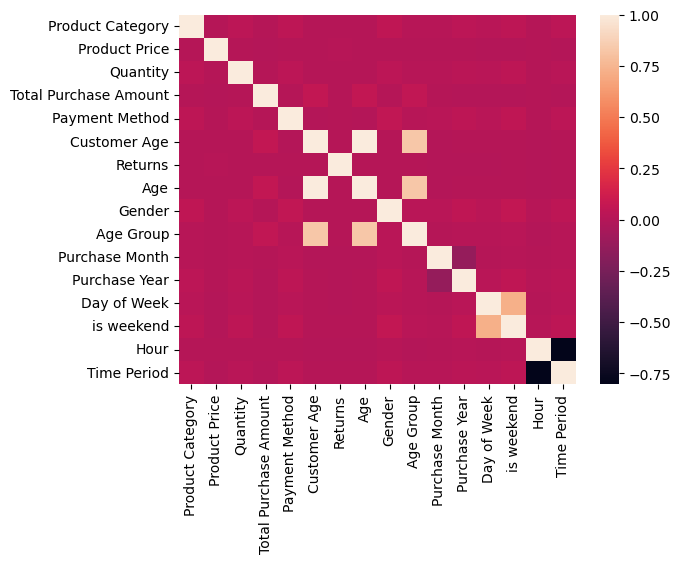

In [85]:
corr_mat = X_ft.corr()
sns.heatmap(corr_mat)

### Observation
### No features had a correlation above 0.8, so no strong multicollinearity was observed.  


## Feature Selection

In [86]:
# Wrapper method
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=7)
rfe.fit(X_new,Y_new)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [87]:
rfe_ranking = pd.DataFrame({'Features':X_new.columns, 'ranking':rfe.ranking_})
rfe_ranking.sort_values(by='ranking')

,Features,ranking
0,Product Category,1
2,Quantity,1
4,Payment Method,1
8,Gender,1
11,Purchase Year,1
13,is weekend,1
15,Time Period,1
12,Day of Week,2
9,Age Group,3
14,Hour,4


In [88]:
selected_features = rfe_ranking[rfe_ranking['ranking'] == 1]['Features'].tolist()

In [89]:
selected_features

['Product Category',
 'Quantity',
 'Payment Method',
 'Gender',
 'Purchase Year',
 'is weekend',
 'Time Period']

### Feature selection was performed using Recursive Feature Elimination (RFE), which selects top 7 best subset features by training and ranking them with a machine learning model.


## Train Test Data split

In [90]:
X_new.shape

(399740, 16)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_new[selected_features], Y_new, test_size=0.2, random_state=1)

## Model Training 

In [92]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

## Prediction 

In [93]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

## Model Evaluation

In [94]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Logistic Regression Results:
Accuracy: 0.654963226096963
Confusion Matrix:
 [[25330 14783]
 [12802 27033]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.65     40113
           1       0.65      0.68      0.66     39835

    accuracy                           0.65     79948
   macro avg       0.66      0.66      0.65     79948
weighted avg       0.66      0.65      0.65     79948

Random Forest Results:
Accuracy: 0.6916870966127984
Confusion Matrix:
 [[28098 12015]
 [12634 27201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70     40113
           1       0.69      0.68      0.69     39835

    accuracy                           0.69     79948
   macro avg       0.69      0.69      0.69     79948
weighted avg       0.69      0.69      0.69     79948



# Summary
### After applying SMOTE to balance the dataset, both models significantly improved their ability to detect churners.

### - Logistic Regression achieved 65.3% accuracy with 68% recall for churners.
### - Random Forest outperformed with 69.1% accuracy and similar 68% recall.

### Based on overall balanced performance, Random Forest is selected as the final model.
